# ch 9. openAI embedding API

word2vec 모델이 단어로부터 임베딩을 추출했듯이, 문장으로부터 embedding을 추출할 수 있습니다. 이를 활용하여 검색, 추천 등을 구현할 수 있습니다. 최근 openAI의 chatGPT와 같은 서비스들이 부상하면서, 대규모 언어모델을 학습시킬 때 사용한 임베딩 모델을 API로 공개한 제품들이 속속 등장하고 있습니다.  뛰어난 성능과 저렴한 가격으로 부담없이 사용할 수 있으며, 이를 응용해서  텍스트 검색 등을 구현할 수 있습니다.

이번 챕터에서는 openAI embedding API를 어떻게 사용할 수 있는지, 그리고 벡터 데이터 베이스와 함께 사용해서 유저가 자신의 취향을 입력하면 이에 알맞은 책을 추천해주는 서비스를 구현해봅니다.

구현할 파이프라인은 다음과 같습니다.

1. 입력 텍스트를 영어로 번역
2. 임베딩 추출 
3. vector database에 유사도 검색
4. 추천사 작성 

이를 위해선 미리 책의 줄거리들의 임베딩 벡터를 추출하여 벡터 데이터베이스에 채워넣어야 합니다. 스텝 바이 스텝으로 구현해보겠습니다.

## 데이터 셋 준비

yes24에서 미리 수집한 데이터 셋을 불러오겠습니다. yes24에서 2010년 이후로 판매된 한국 소설, 장르 소설 18000여권의 데이터를 크롤링한 데이터 셋입니다. 책의 제목, 줄거리, 줄거리의 영문 번역 등을 포함합니다.

## openai embedding API

openai embedding API는 텍스트를 입력하면 그 의미를 담은 3072 차원의 임베딩을 리턴해주는 서비스입니다. embedding API를 이용하여 질문에 대한 답변 생성, 문장 유사도 비교, 문장 분류 등을 수행할 수 있습니다.  속도가 빠르면서도 저렴하여 굉장히 활용도가 높습니다.

문서: https://platform.openai.com/docs/guides/embeddings

## 배치 단위로 임베딩 벡터 뽑아오기

## 임베딩 벡터 데이터 불러오기

18000개의 책 줄거리의 embedding을 모두 추출할 경우 10분 정도의 시간과 천원 정도의 비용이 발생합니다. 여기서는 미리 추출한 임베딩을 불러오겠습니다. 

이 임베딩 벡터는 소설의 줄거리를 openAI embedding API로 추출한 것입니다.

문자열 형태의 임베딩을 list로 바꿔주겠습니다.

한번 임베딩 벡터의 차원을 확인해보면 512 차원임을 알 수 있습니다.

## 벡터 인덱싱

유저가 읽고 싶은 책 내용을 입력했을 때, 이와 유사한 내용을 가진 책을 추천해주고자 합니다. 이를 위해서 앞서 추출한 18000여권의 책의 영문 줄거리의 임베딩 벡터를 벡터 데이터베이스에 인덱싱 해주어야 합니다. 이미지 검색 구현에 사용했던 pinecone을 다시 사용해보겠습니다.

### pinecone index 설정

pinecone 콘솔로 이동하여 이미지 검색에 사용했던 인덱스는 삭제하고, 텍스트 임베딩을 저장할 인덱스를 생성해줍니다. 이 때, 차원을 반드시 512로 맞춰주셔야 합니다.

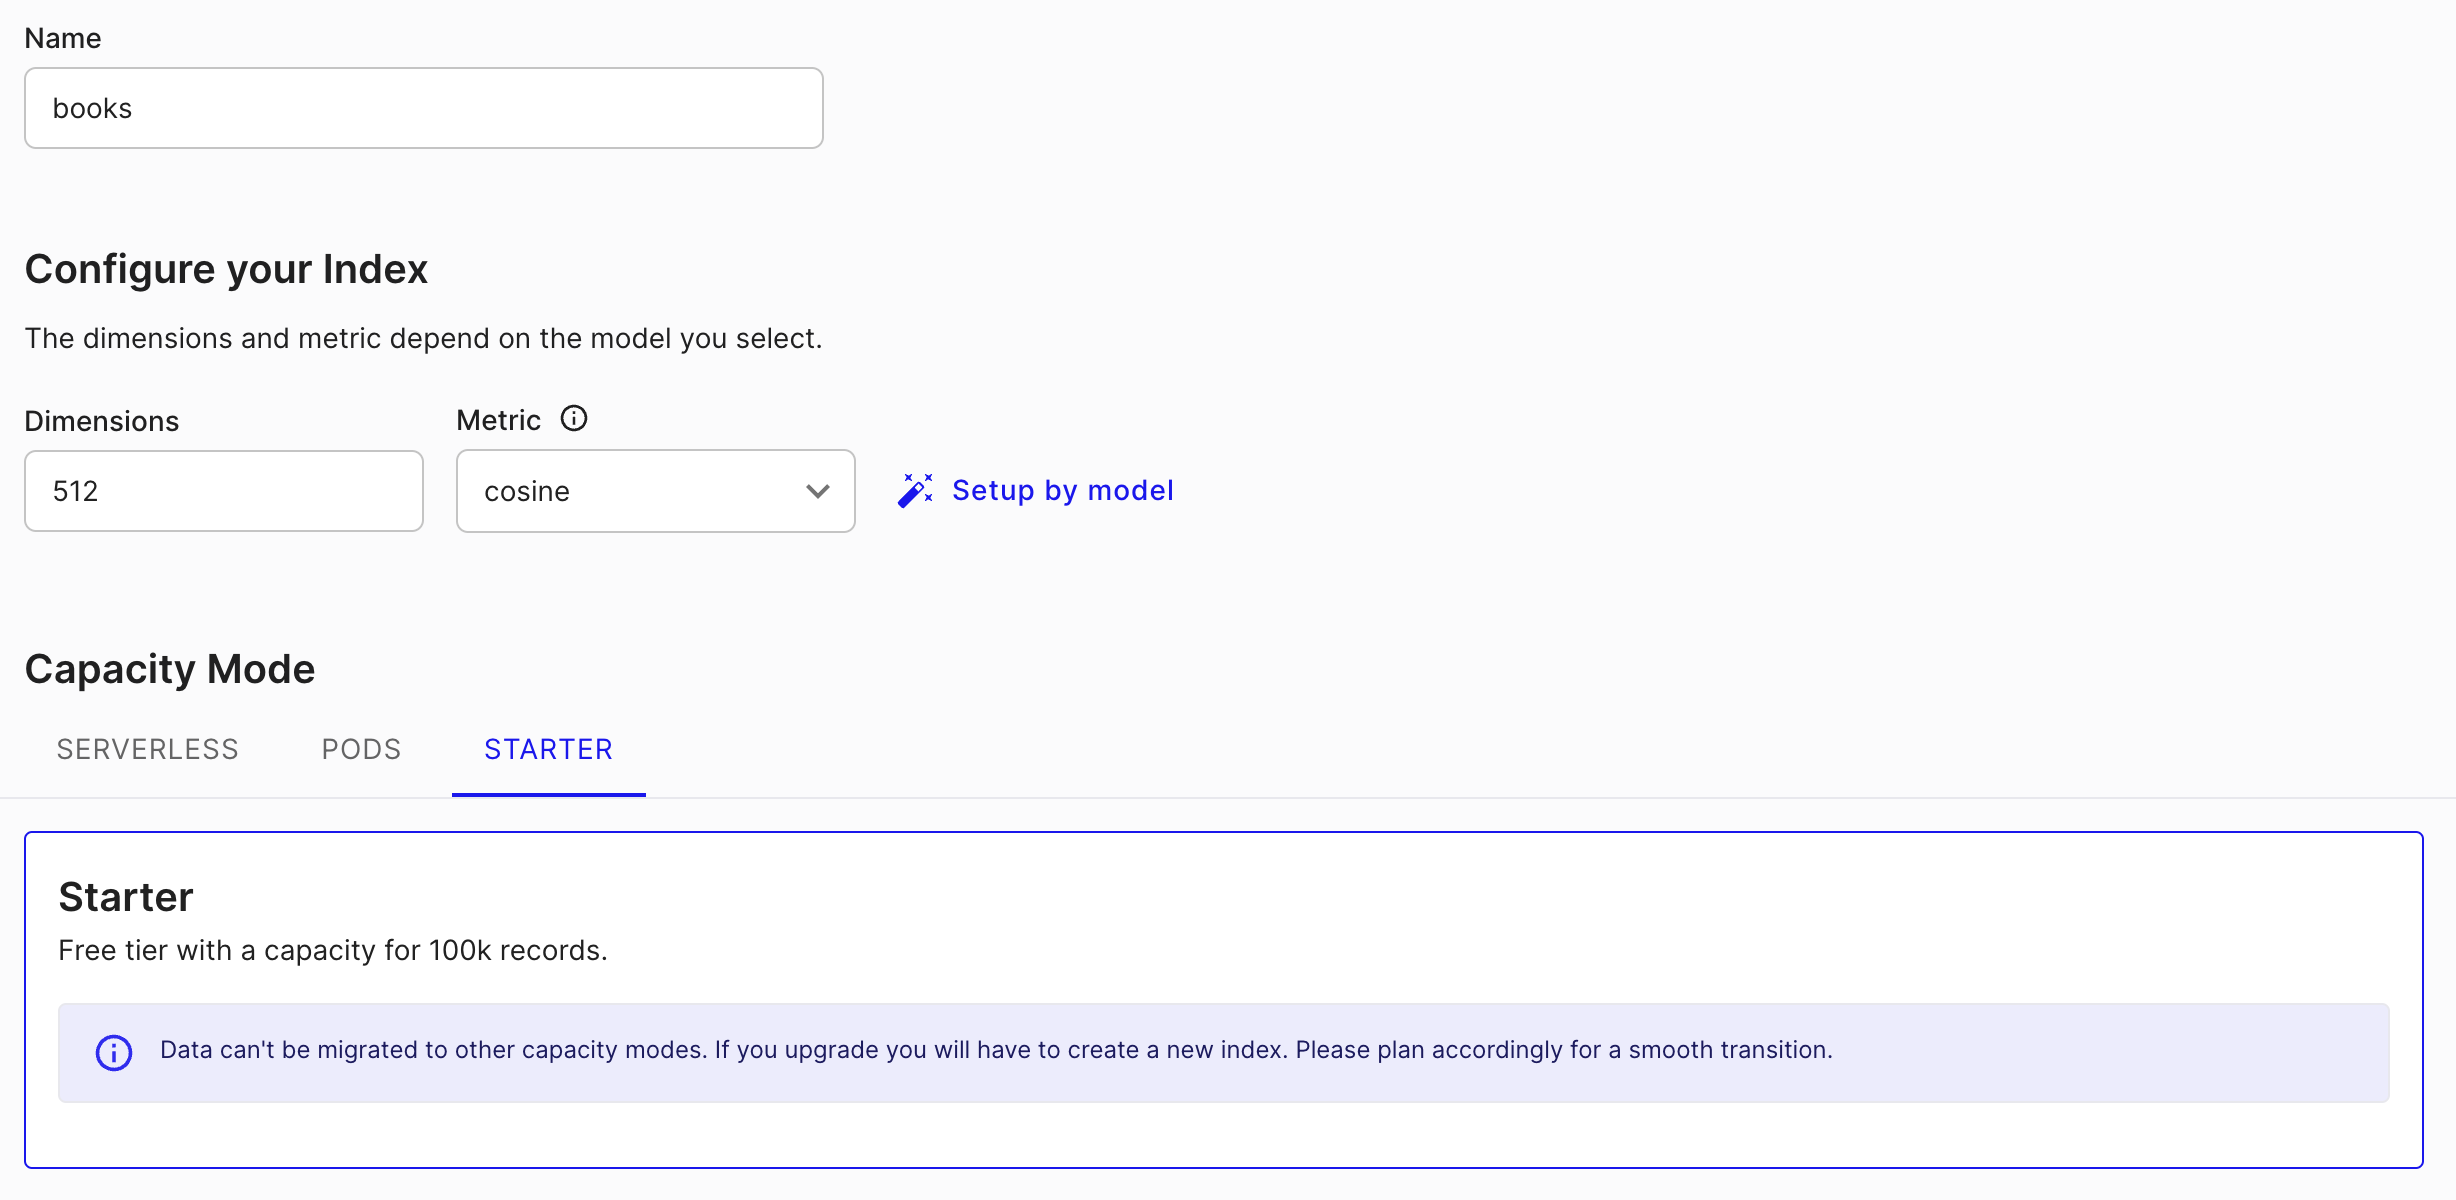

### pinecone 인덱스 접속 설정

pinecone console에서 인덱스 접속 정보를 확인하겠습니다.

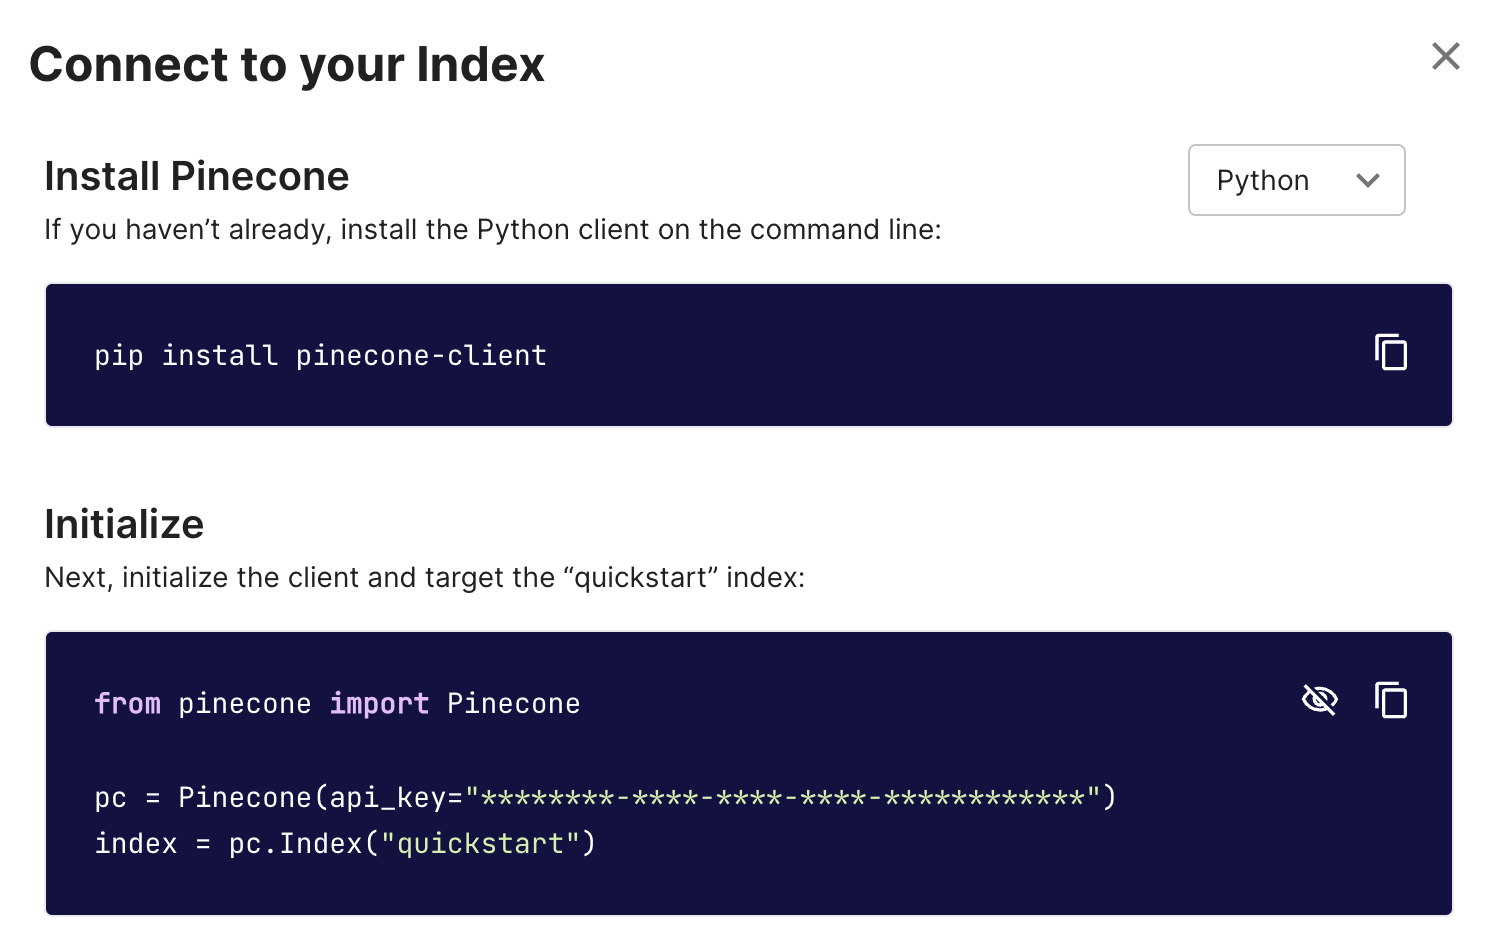

접속 정보를 입력하고 pinecone index 객체를 생성하겠습니다.

### 벡터 저장

이제 임베딩 벡터와 메타데이터를 묶어서 벡터 데이터 베이스에 저장하겠습니다. 코드는 이미지 검색 구현 시에 사용했던 코드와 동일합니다.

벡터들이 잘 저장되었는지 확인해보겠습니다.

## 영문 번역

한국어로 입력한 쿼리를 영어로 번역한 다음, 임베딩을 뽑은 뒤에 벡터 데이터베이스에 검색해야합니다. 영문 번역에는 구글 번역 API를 사용합니다.

### 구글 번역 사용

GCP console에서 cloud translation API 사용 설정해줍니다.

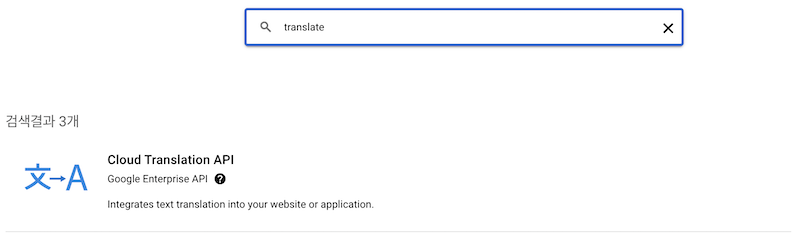

그 다음, IAM 및 관리자 탭에서 서비스 계정을 선택하시고, cloud translation API 관리자 권한을 부여해줍니다.

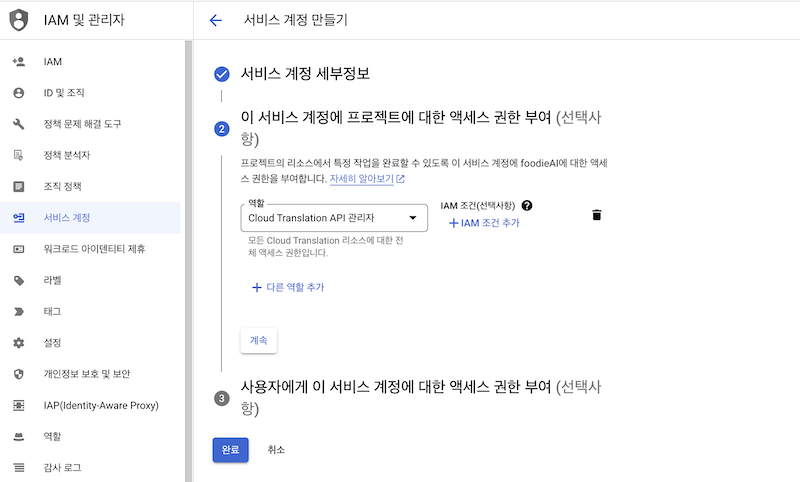

새롭게 만든 서비스 계정에 JSON 타입의 새 키를 만들어 줍니다.

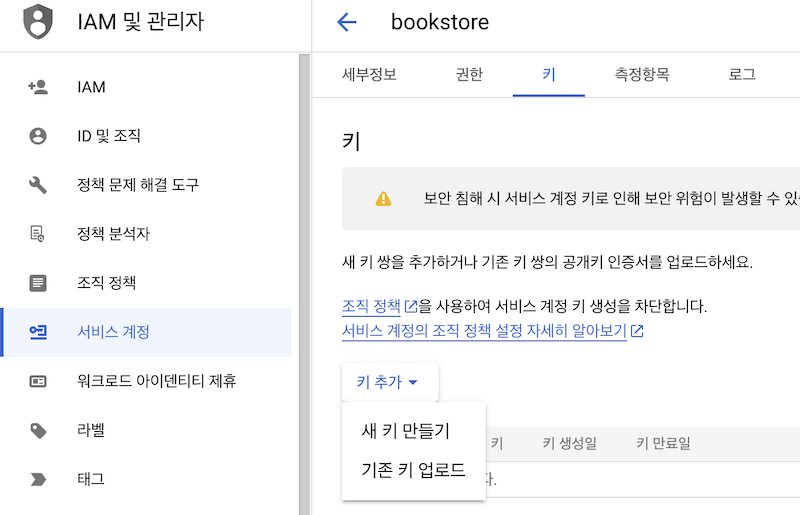

다운받은 키 값은 data 폴더 안에 넣어줍니다. 이제 인증키 값을 가지고 google translation client를 생성해보겠습니다.

In [6]:
!pip install google-auth
!pip install google-cloud-translate

    torch (>=1.9.*)
           ~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
    torch (>=1.9.*)
           ~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 추천 파이프라인 구축

이제 책 줄거리 임베딩 벡터로 디비를 채워놓았으니 추천 파이프라인을 구축해보겠습니다. 

1. 쿼리를 영어로 번역
2. 임베딩 추출
3. 벡터 데이터 베이스에 검색

## 추천 결과를 이용해서 추천사 작성

openAI chat completion API를 이용해서 추천 결과를 가지고 추천사를 작성해보겠습니다. 

### 프롬프트

추천사를 작성해달라는 지시와 추천 결과를 함께 넣어서 프롬프트를 작성해줍니다.

### ChatCompletion API

openai에서 제공하는 ChatCompletion API에 프롬프트를 넣어서 요청을 보냅니다. 이 때, AI의 역할을 부여해주면 더 그럴듯한 텍스트가 생성됩니다.

## 정리

이번 챕터에서는 openAI embedding API를 이용하여 책을 추천해주는 기능을 구현해보았습니다. 문장으로부터 임베딩을 뽑아서 검색 및 추천을 구현할 수 있었습니다. 이는 tf-idf와 같은 전통적인 방식의 NLP 기법들보다 훨씬 뛰어난 성능을 보여줍니다. 적절하게 텍스트를 임베딩하여 내가 원하는 결과를 뽑아낼 수 있으면 좋겠습니다.